## 1. Make an arbitrary graph directed.

DEBUG:root:decomposing [1, 0, 19, 18, 17, 16, 15]...


DEBUG:root:[{1: 0, 0: 1}, [1, 0]]
DEBUG:root:[{1: 0, 0: 1, 19: 2}, [1, 0, 19]]
DEBUG:root:[{1: 0, 0: 1, 19: 2, 18: 3}, [1, 0, 19, 18]]
DEBUG:root:[{1: 0, 0: 1, 19: 2, 18: 3, 17: 4}, [1, 0, 19, 18, 17]]
DEBUG:root:[{1: 0, 0: 1, 19: 2, 18: 3, 17: 4, 16: 5}, [1, 0, 19, 18, 17, 16]]
DEBUG:root:[{1: 0, 0: 1, 19: 2, 18: 3, 17: 4, 16: 5, 15: 6}, [1, 0, 19, 18, 17, 16, 15]]
DEBUG:root:Done decomposition.
DEBUG:root:decomposing [2, 3, 4, 5, 6, 2]...
DEBUG:root:[{2: 0, 3: 1}, [2, 3]]
DEBUG:root:[{2: 0, 3: 1, 4: 2}, [2, 3, 4]]
DEBUG:root:[{2: 0, 3: 1, 4: 2, 5: 3}, [2, 3, 4, 5]]
DEBUG:root:[{2: 0, 3: 1, 4: 2, 5: 3, 6: 4}, [2, 3, 4, 5, 6]]
DEBUG:root:[{2: 0}, [2]]
DEBUG:root:Done decomposition.
DEBUG:root:decomposing [4, 17]...
DEBUG:root:[{4: 0, 17: 1}, [4, 17]]
DEBUG:root:Done decomposition.
DEBUG:root:decomposing [14, 7, 6]...
DEBUG:root:[{14: 0, 7: 1}, [14, 7]]
DEBUG:root:[{14: 0, 7: 1, 6: 2}, [14, 7, 6]]
DEBUG:root:Done decomposition.
DEBUG:root:decomposing [2, 1, 8, 7]...
DEBUG:root:[{2: 0, 1

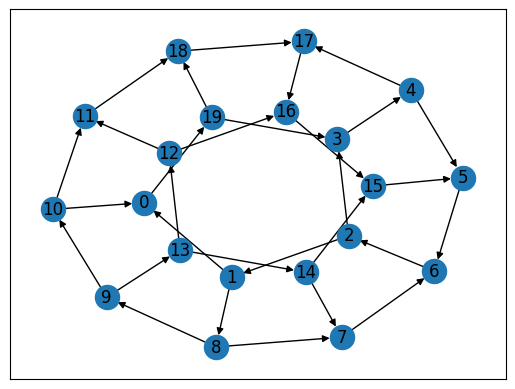

In [6]:
import networkx as nx
import matplotlib
import genice_core

g = nx.dodecahedral_graph()  # dodecahedral 20mer
pos = nx.spring_layout(g)

# set orientations of the hydrogen bonds.
dg = genice_core.ice_graph(g)

nx.draw_networkx(dg, pos)

## 2. And depolarized.

DEBUG:root:decomposing [19, 0, 10, 9]...
DEBUG:root:[{19: 0, 0: 1}, [19, 0]]
DEBUG:root:[{19: 0, 0: 1, 10: 2}, [19, 0, 10]]
DEBUG:root:[{19: 0, 0: 1, 10: 2, 9: 3}, [19, 0, 10, 9]]
DEBUG:root:Done decomposition.
DEBUG:root:decomposing [0, 1, 8, 7]...
DEBUG:root:[{0: 0, 1: 1}, [0, 1]]
DEBUG:root:[{0: 0, 1: 1, 8: 2}, [0, 1, 8]]
DEBUG:root:[{0: 0, 1: 1, 8: 2, 7: 3}, [0, 1, 8, 7]]
DEBUG:root:Done decomposition.
DEBUG:root:decomposing [8, 9, 13, 12, 16, 17, 18, 19, 3, 2, 1]...
DEBUG:root:[{8: 0, 9: 1}, [8, 9]]
DEBUG:root:[{8: 0, 9: 1, 13: 2}, [8, 9, 13]]
DEBUG:root:[{8: 0, 9: 1, 13: 2, 12: 3}, [8, 9, 13, 12]]
DEBUG:root:[{8: 0, 9: 1, 13: 2, 12: 3, 16: 4}, [8, 9, 13, 12, 16]]
DEBUG:root:[{8: 0, 9: 1, 13: 2, 12: 3, 16: 4, 17: 5}, [8, 9, 13, 12, 16, 17]]
DEBUG:root:[{8: 0, 9: 1, 13: 2, 12: 3, 16: 4, 17: 5, 18: 6}, [8, 9, 13, 12, 16, 17, 18]]
DEBUG:root:[{8: 0, 9: 1, 13: 2, 12: 3, 16: 4, 17: 5, 18: 6, 19: 7}, [8, 9, 13, 12, 16, 17, 18, 19]]
DEBUG:root:[{8: 0, 9: 1, 13: 2, 12: 3, 16: 4, 17: 5, 18

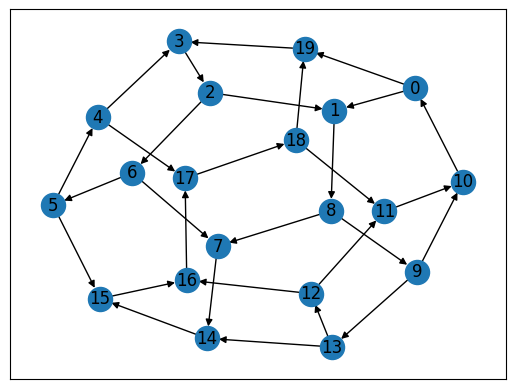

In [7]:
import networkx as nx
import matplotlib
import genice_core
from logging import getLogger, DEBUG, basicConfig

basicConfig(level=DEBUG)
logger = getLogger

g = nx.dodecahedral_graph()  # dodecahedral 20mer
pos = nx.spring_layout(g)

# set orientations of the hydrogen bonds.
# Minimize the net dipole moment.
dg = genice_core.ice_graph(g, pos, dipoleOptimizationCycles=100)

nx.draw_networkx(dg, pos)

## 3. Under the periodic boundary condition.

In [8]:
from logging import DEBUG, INFO, basicConfig, getLogger

import networkx as nx
import numpy as np

# import py3Dmol
import pairlist
from genice_core import ice_graph

logger = getLogger()
basicConfig(level=INFO)

# a sample structure of ice 1h.
# The first line specifies the cell dimension, and atomic positions (absolute) follows.
pos = np.loadtxt("ice1h.txt").reshape(-1, 3)
cell, coords = pos[0], pos[1:]

# prepare the cell matrix
cellmat = np.diag(cell)

# make the fractional coordinates
fracCoords = coords / cell

# make a graph from the proximity
g = nx.Graph([(i, j) for i, j, _ in pairlist.pairs_iter(fracCoords, 0.3, cellmat)])

# set orientations of the hydrogen bonds.
dg = ice_graph(
    g, vertexPositions=fracCoords, isPeriodicBoundary=True, dipoleOptimizationCycles=100
)
dg

DEBUG:root:cell a [2.34685163 0.         0.        ]
DEBUG:root:cell b [0.         2.20607179 0.        ]
DEBUG:root:cell c [0.         0.         2.71095555]
DEBUG:root:Grid divisions: [7. 7. 9.]
DEBUG:root:decomposing [0, 1, 81, 276, 330, 303, 189, 54, 5, 216, 168, 321, 348, 294, 186, 312, 339, 420, 132, 49, 48, 160, 205, 70, 393, 366, 204, 69, 35, 231, 255, 66, 28, 228, 119, 407, 326, 272, 164, 137, 209, 371, 398, 72, 261, 425, 401, 10, 86, 140, 212, 77, 266, 320, 347, 374, 401, 75, 47, 46, 131, 293, 347, 428, 264, 240, 53, 159, 105, 291, 183, 309, 204, 159, 186, 234, 134, 52, 53, 78, 404, 428, 113, 275, 89, 17, 16, 222, 113, 10, 11, 219, 243, 407, 383, 29, 122, 284, 176, 233, 32, 33, 124, 412, 251, 305, 179, 152, 197, 359, 386, 34, 98, 368, 395, 419, 338, 284, 98, 152, 32, 71, 394, 418, 257, 311, 206, 161, 107, 293, 185, 158, 104, 290, 128, 237, 47, 156, 201, 66, 392, 365, 203, 68, 27, 26, 94, 364, 337, 283, 175, 232, 30, 70, 259, 226, 178, 304, 331, 277, 169, 142, 12, 13, 402, 426